In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC
import scipy.stats as stats

In [3]:
data = pd.read_excel('video_data.xlsx', nrows=249)
video_data = data.loc[data['duration'] <= 200]

In [4]:
video_data.head()

,time,location,station,position,incident,duration,event,comment,race
0,3/2/19 1:30:04,DB,1,Cashier,NaN,28,soft drink,NaN,NaN
1,3/2/19 1:30:32,DB,1,Cashier,NaN,100,beer/id scan/mixed drink,NaN,NaN
2,3/2/19 1:32:12,DB,1,Cashier,NaN,69,mixed drink,NaN,NaN
3,3/2/19 1:33:21,DB,1,Cashier,NaN,24,draft,NaN,NaN
4,3/2/19 1:33:45,DB,1,Cashier,NaN,88,can beer/mixed drink,NaN,NaN


In [5]:
video_data['event'] = video_data['event'].str.replace('can beer', 'beer').str.replace('bottle', 'beer')

In [6]:
video_data['event'] = video_data['event'].str.replace('beer \(\d\)', 'beer').str.replace('mixed drink \(\d\)', 'mixed drink')

In [7]:
video_data['event'].value_counts().head()

mixed drink            67
draft                  52
beer                   21
id scan/mixed drink    14
mixed drink/beer        9
Name: event, dtype: int64

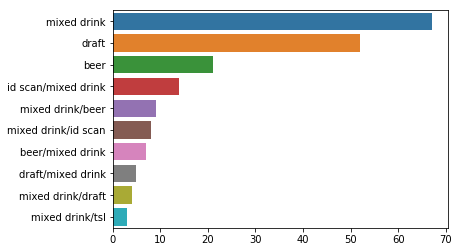

In [8]:
values = video_data.event.value_counts()[:10]
sns.barplot(x=values.values, y=values.index);

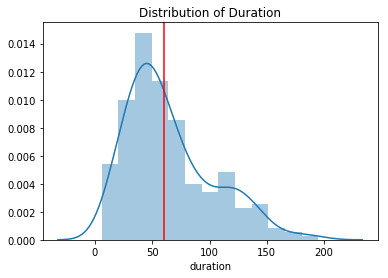

In [39]:
sns.distplot(video_data['duration']);
plt.axvline(60, c='r');
plt.title('Distribution of Duration');

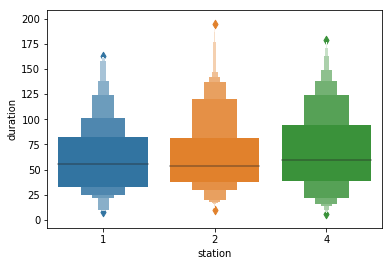

In [10]:
sns.boxenplot(y=video_data['duration'], x=video_data['station']);

In [11]:
video_data = video_data.join(video_data['event'].str.get_dummies(sep='/'))
video_data.head()

,time,location,station,position,incident,duration,event,comment,race,beer,...,logged something,mixed drink,no customer,place to keep clothes,question asked,soft drink,talked to the customer and then he walked off,talks to other bartender,tsl,water
0,3/2/19 1:30:04,DB,1,Cashier,NaN,28,soft drink,NaN,NaN,0,...,0,0,0,0,0,1,0,0,0,0
1,3/2/19 1:30:32,DB,1,Cashier,NaN,100,beer/id scan/mixed drink,NaN,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,3/2/19 1:32:12,DB,1,Cashier,NaN,69,mixed drink,NaN,NaN,0,...,0,1,0,0,0,0,0,0,0,0
3,3/2/19 1:33:21,DB,1,Cashier,NaN,24,draft,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,3/2/19 1:33:45,DB,1,Cashier,NaN,88,beer/mixed drink,NaN,NaN,1,...,0,1,0,0,0,0,0,0,0,0


In [12]:
dummies = video_data.columns.tolist()[9:]
video_data[dummies].sum()

beer                                              50
cigar                                              4
contamination to the food area                     1
customer approached and left                       1
desorganized line                                  1
draft                                             71
id scan                                           33
logged something                                   1
mixed drink                                      134
no customer                                        1
place to keep clothes                              1
question asked                                     3
soft drink                                         5
talked to the customer and then he walked off      1
talks to other bartender                           1
tsl                                                8
water                                              3
dtype: int64

In [13]:
video_data = video_data.join(pd.get_dummies(video_data['station']))

In [14]:
X = video_data[['beer', 'draft', 'mixed drink', 1, 2, 4]]
y = video_data['duration']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Exploring different models

In [16]:
columns = ['beer', 'draft', 'mixed drink', 1, 2, 4]
index = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']

### Linear

In [17]:
linear = linear_model.LinearRegression(fit_intercept=False)
linear.fit(X_train, y_train)
print(linear.coef_)

[14.05238447 19.4396378  48.53388294 29.18945686 30.10283474 24.09579084]


In [18]:
linear.fit(X_test, y_test)
print(linear.coef_)

[ 5.94224067 20.3061038  39.90497641 32.03689293 33.51330357 55.20476855]


In [19]:
y_pred = linear.predict(X_test)
linear_rmse = mean_squared_error(y_test, y_pred)**.5
linear_score = linear.score(X_test, y_test)

### Ridge

In [20]:
ridge = linear_model.Ridge(fit_intercept=False)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[14.11612634 19.44594522 48.43154825 28.27249532 29.79586879 23.35636124]


In [21]:
ridge.fit(X_test, y_test)
print(ridge.coef_)

[ 7.79925939 21.95419503 41.83805669 28.88315176 30.96177499 50.26966699]


In [22]:
y_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred)**.5
ridge_score = ridge.score(X_test, y_test)

### Lasso

In [23]:
lasso = linear_model.Lasso(fit_intercept=False)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[10.90336974 17.93649184 50.60492083 24.74935482 28.53996462 17.9364949 ]


In [24]:
lasso.fit(X_test, y_test)
print(lasso.coef_)

[ 4.02599167 19.73601984 42.71067123 27.25329979 30.94670743 47.69241561]


In [25]:
y_pred = lasso.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_pred)**.5
lasso_score = lasso.score(X_test, y_test)

### ElasticNet

In [26]:
elastic = linear_model.ElasticNet(fit_intercept=False)
elastic.fit(X_train, y_train)
print(elastic.coef_)

[ 8.64264993 11.5655136  31.53260083 11.10580846 23.15558976  9.70440562]


In [27]:
elastic.fit(X_test, y_test)
print(elastic.coef_)

[ 8.25339415 13.01971595 31.3360914  12.98005657 20.79859316 14.26030105]


In [28]:
y_pred = elastic.predict(X_test)
elastic_rmse = mean_squared_error(y_test, y_pred)**.5
elastic_score = elastic.score(X_test, y_test)

# Comparisons

In [29]:
coefficientsdf = pd.DataFrame(data=[linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_], columns=columns, 
                            index=index)
coefficientsdf

,beer,draft,mixed drink,1,2,4
Linear,5.942241,20.306104,39.904976,32.036893,33.513304,55.204769
Ridge,7.799259,21.954195,41.838057,28.883152,30.961775,50.269667
Lasso,4.025992,19.736020,42.710671,27.253300,30.946707,47.692416
Elastic Net,8.253394,13.019716,31.336091,12.980057,20.798593,14.260301


In [30]:
rmses = [linear_rmse, ridge_rmse, lasso_rmse, elastic_rmse]
scores = [linear_score, ridge_score, lasso_score, elastic_score]
df = pd.DataFrame(data=[rmses, scores], columns=index, index=['RMSE', 'Score'])
df

,Linear,Ridge,Lasso,Elastic Net
RMSE,33.428538,33.472707,33.645440,43.365813
Score,0.231927,0.229896,0.221927,-0.292596


# Figuring out the best features

In [31]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X_test,y_test)
params = lm.coef_
predictions = lm.predict(X_test)

newX = pd.DataFrame(X_test)
MSE = (sum((y_test-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
myDF3.set_index(X_test.columns, inplace=True)
print(myDF3)

             Coefficients  Standard Errors  t values  Probabilites
beer               5.9422            9.596     0.619         0.537
draft             20.3061           10.337     1.964         0.052
mixed drink       39.9050            8.651     4.613         0.000
1                 32.0369           10.909     2.937         0.004
2                 33.5133            9.556     3.507         0.001
4                 55.2048           11.169     4.943         0.000
